In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect,distinct

In [32]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_64084\2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [34]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
# Query the last date in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [38]:
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(last_date[0], '%Y-%m-%d') 
start_date=last_year- dt.timedelta(days=365)
print(start_date)



2016-08-23 00:00:00


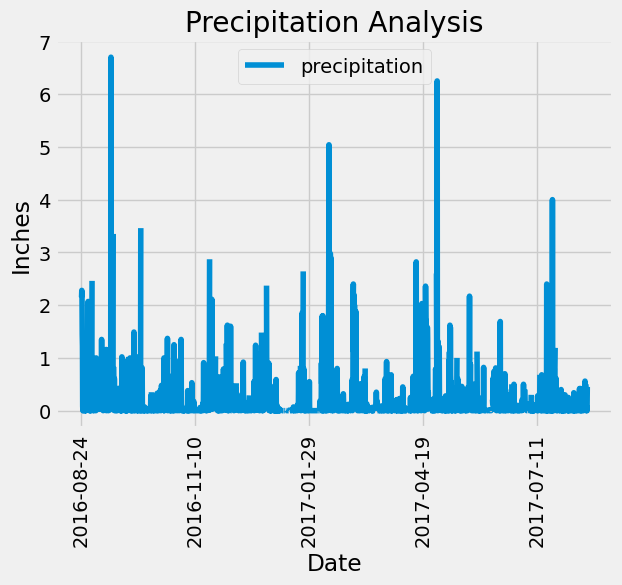

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
 

# Sort the dataframe by date
df = df.sort_values(by='date')
 


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.show()



In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
# Query to count the number of stations
station_count = session.query(Station.station).count()
print(station_count)

9


In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Query to count the number of rows per station
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(station_count)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [43]:
for station, count in station_count:
    print(f"('{station}', {count}),")


('USC00519281', 2772),
('USC00519397', 2724),
('USC00513117', 2709),
('USC00519523', 2669),
('USC00516128', 2612),
('USC00514830', 2202),
('USC00511918', 1979),
('USC00517948', 1372),
('USC00518838', 511),


In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to find the lowest, highest, and average temperature for the most active station 
most_active_station = station_count[0][0]
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
print(temp_stats)

[(54.0, 85.0, 71.66378066378067)]


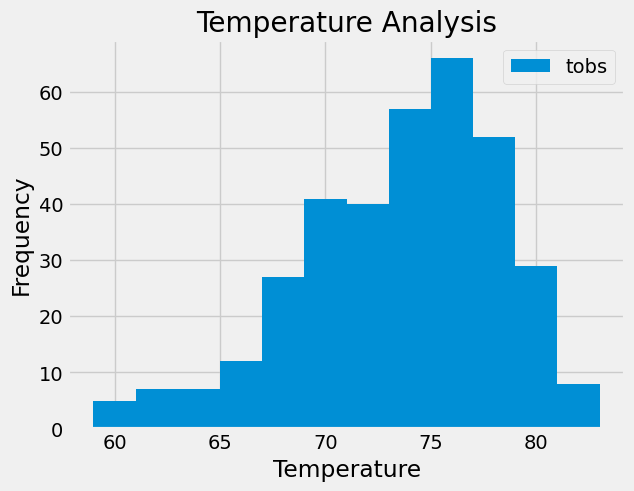

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query to retrieve the last 12 months of temperature observation data for the most active station
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == most_active_station).all()
# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'tobs'])
# Plot the results as a histogram
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Analysis")
plt.show()

# Close Session

In [46]:
# Close Session
session.close()